In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations
from operator import itemgetter

In [42]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [68]:
def barplot_nodes(graph,centrality, centrality_name, pos):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
    fig.suptitle(centrality_name + ' Centrality barplot and nodes highlights')

    #barplot
    x=[]
    y=[]
    cent_sorted = {}
    labels = {}

    centrality = sorted(centrality.items(), key=lambda x:x[1], reverse=True)
    for nodi in centrality:
        cent_sorted.update({nodi[0]: nodi[1]})
    centrality = cent_sorted
    for key, value in cent_sorted.items():
        if len(x) < 10:
            x.append(key)
            y.append(value)
            labels[key]=key
            print(value)
    plt.figure(figsize=(15,10))
    sns.barplot(x=x, y=y, ax=ax1)
    ax1.bar_label(ax1.containers[0])


    #ottenimento dei colori
    col = []
    x_values = ax1.get_xticklabels()
    x_values = [x.get_text() for x in x_values]
    for i in range(0, len(ax1.patches)):
        colori = []
        colori = list(ax1.patches[i].get_facecolor())
        colori.append(x_values[i])
        col.append(colori)
    
    dizionario_colori = {}
    for colori in col:
        color_HEX = "#" + hex(int(colori[0]*255))[2:].zfill(2) + hex(int(colori[1]*255))[2:].zfill(2) + hex(int(colori[2]*255))[2:].zfill(2)
        dizionario_colori.update({colori[4]: color_HEX})
    print(dizionario_colori)



    #aggiunta nodi colorati in base al barplot
    plt.figure(figsize=(12,8))
    #pos_sample = nx.kamada_kawai_layout(graph)
    pos_sample = pos
    nx.draw(graph, pos_sample, ax=ax2, with_labels = False)
    nx.draw_networkx_nodes(graph, pos_sample, ax=ax2, nodelist=list(dizionario_colori.keys()), node_color=list(dizionario_colori.values()))
    plt.show()

    return dizionario_colori

In [44]:
def important_node_centrality_plot(centrality, df_edge, dizionario_colori):
    x=[]
    y=[]
    cent_sorted = {}
    labels = {}

    centrality = sorted(centrality.items(), key=lambda x:x[1], reverse=True)
    for nodi in centrality:
        cent_sorted.update({nodi[0]: nodi[1]})
    centrality = cent_sorted
    for key, value in cent_sorted.items():
        if len(x) < 10:
            x.append(key)
            y.append(value)
            labels[key]=key
    
    nodes = labels
    edges = []

    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))

    graph_deg = nx.Graph()
    graph_deg.add_edges_from(edges)
    graph_deg.add_nodes_from(nodes)
    pos_deg = nx.kamada_kawai_layout(graph_deg)

    plt.figure(figsize=(12,8))
    nx.draw(graph_deg, pos_deg, node_size=1000, nodelist=list(dizionario_colori.keys()), with_labels = False, node_color=list(dizionario_colori.values())) 
    nx.draw_networkx_labels(graph_deg, pos_deg, labels)
    plt.show()

In [45]:
df_edge = pd.read_csv('twitch\DE\musae_DE_edges_username.csv')
df_target = pd.read_csv('twitch\DE\musae_DE_target.csv')

In [46]:
df_target = df_target[df_target.partner.eq(True)]
df_target = df_target[df_target.mature.eq(False)]

In [47]:
#Caricamento del grafo orientato
nodes = df_target['username'].to_list()
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

In [48]:
graph = nx.Graph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
graph = graph.subgraph(n for n, d in graph.degree() if d > 1)
pos = nx.kamada_kawai_layout(graph)

### Analisi descrittiva

In [49]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
print("IS_CONNECTED: ", nx.is_connected(graph))
if nx.is_connected(graph):
    print("RAGGIO: ", nx.radius(graph))
    print("DIAMETRO: ", nx.diameter(graph))

NODES:  206
EDGES:  1259
DENSITY:  0.06
CLUSTERING:  0.3471069708079443
IS_CONNECTED:  True
RAGGIO:  3
DIAMETRO:  5


In [50]:
nx.clustering(graph)

{'grumm3l': 0.19444444444444445,
 'riokatlp': 0.19444444444444445,
 'ratking': 0.11688311688311688,
 'mori09tv': 0.39166666666666666,
 'lp4charity': 0.26666666666666666,
 'eikarrramba': 0.25757575757575757,
 'youbetterknowme': 0.16374269005847952,
 'summonersinnlive': 0.21512605042016808,
 'mootality': 0.4,
 'jeff': 0.2578947368421053,
 'velafee': 0.34065934065934067,
 'miamouz': 0.1975806451612903,
 'nintendino': 0.2315270935960591,
 'horstor': 0.25,
 'perrick': 0.2962962962962963,
 'doktorfroid': 0.36666666666666664,
 'norisk': 0.3974358974358974,
 'corrona': 0.21645021645021645,
 'lessqqll': 0.29365079365079366,
 'sukidingels': 0.31225296442687744,
 'lumemories': 0.2857142857142857,
 'einpapo': 0.31,
 'mrmoregame': 0.2399193548387097,
 'dj_michii': 0.25,
 'dracon': 0.2,
 'cmdkrieger': 0.11088709677419355,
 'papaplatte': 0.1515837104072398,
 'wildeuschi': 0.2,
 'lpmassive': 0.1323529411764706,
 'meloonie': 0.1503267973856209,
 'brogamerview': 0.3333333333333333,
 'flyinguwe87': 0.150

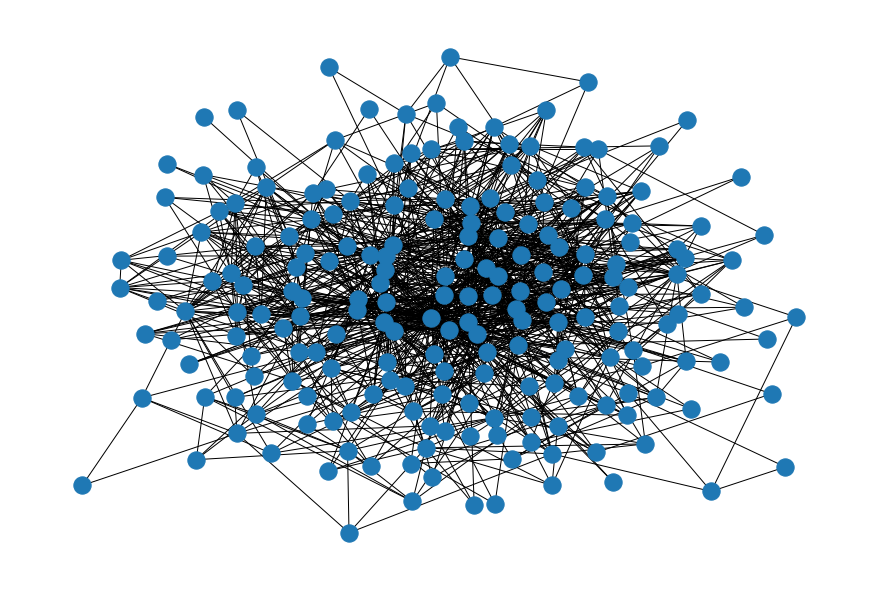

In [51]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

<Figure size 1080x720 with 0 Axes>

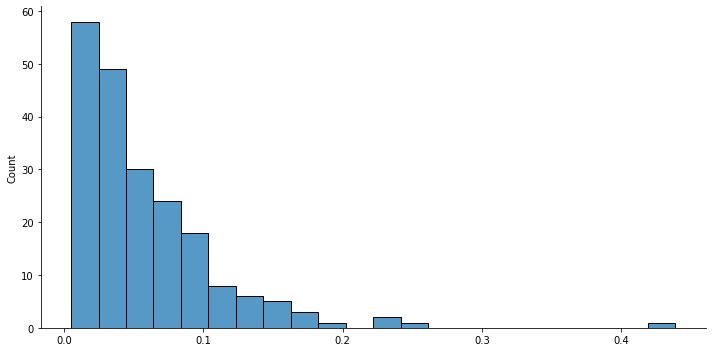

In [52]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(degree.values()), kde=False, aspect = 2)

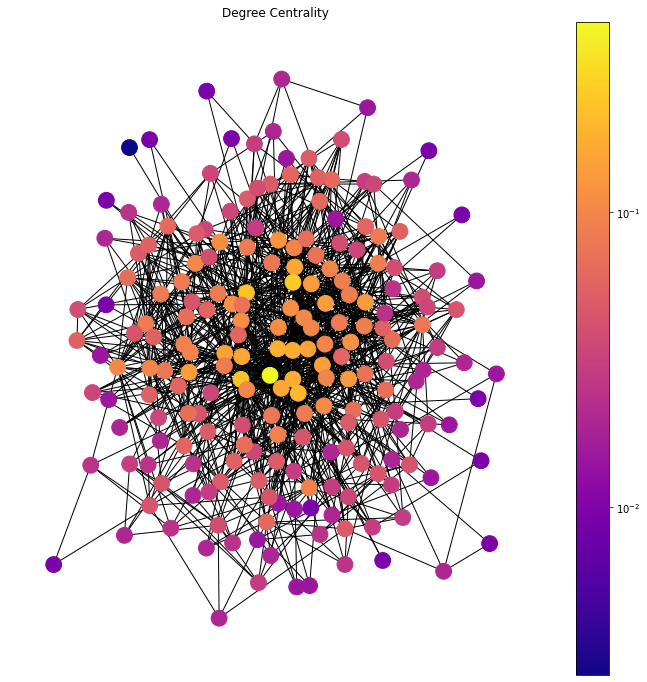

In [53]:
plt.figure(figsize=(12,12))
#pos = nx.kamada_kawai_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

0.43902439024390244
0.25365853658536586
0.22926829268292684
0.22439024390243903
0.2
0.18048780487804877
0.17073170731707318
0.16585365853658537
0.15609756097560976
0.15609756097560976
{'gronkh': '#3173a1', 'papaplatte': '#e0802c', 'rocketbeanstv': '#3a913a', 'ungespielt': '#c03c3d', 'biberbros': '#9371b2', 'laraloft': '#835b53', 'summonersinnlive': '#d584bc', 'shlorox': '#7f7f7f', 'miamouz': '#a8a935', 'mrmoregame': '#2dabb8'}


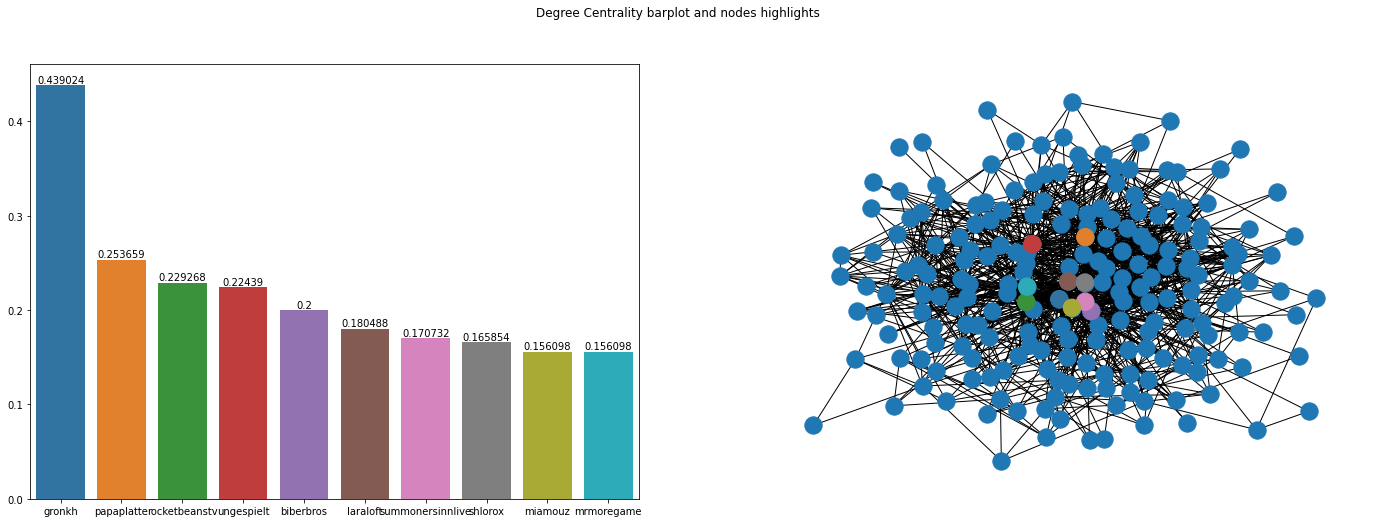

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [69]:
dizionario_colori = barplot_nodes(graph,degree, "Degree", pos)

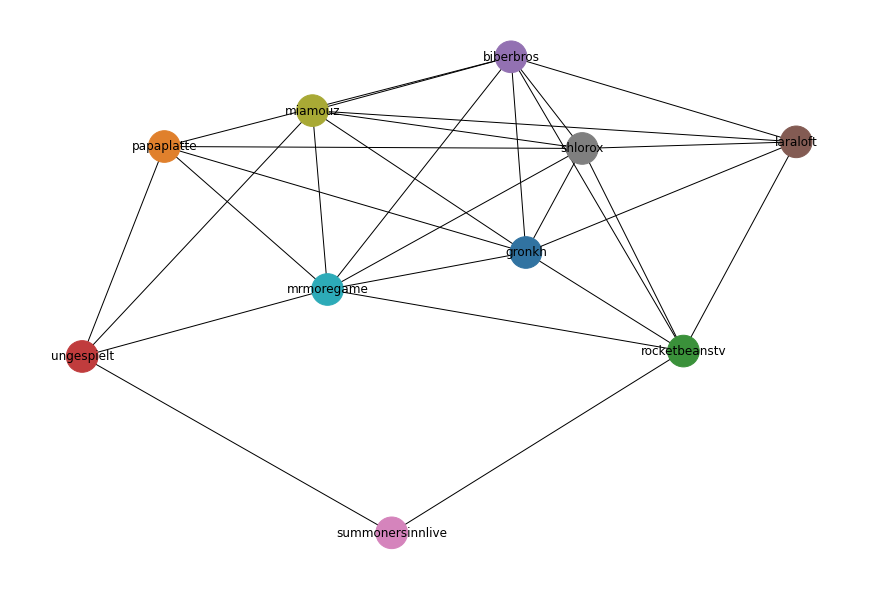

In [55]:
important_node_centrality_plot(degree, df_edge, dizionario_colori)

Betweenness Centrality

<Figure size 1080x720 with 0 Axes>

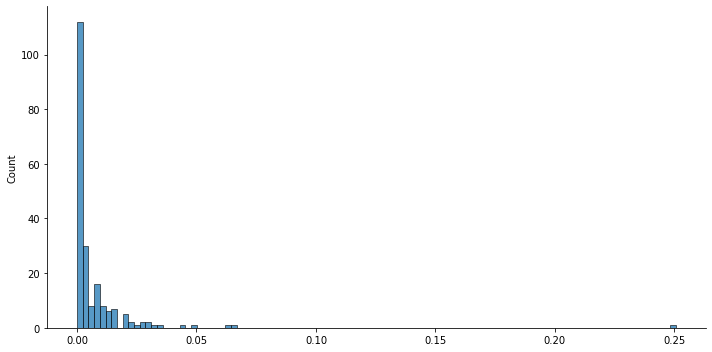

In [56]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(bet.values()), kde=False, aspect = 2)

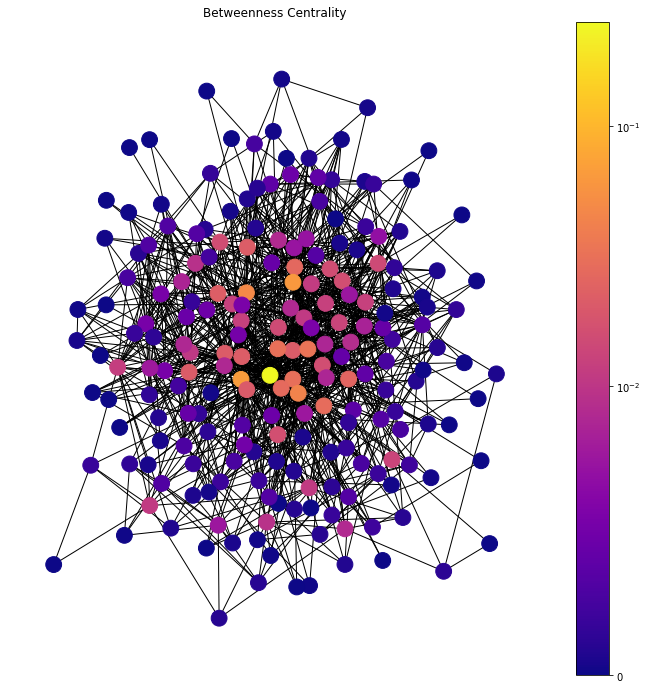

In [57]:
plt.figure(figsize=(12,12))
#pos = nx.kamada_kawai_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

0.25055232222709906
0.06657229058289234
0.062302663168747933
0.0482205872853264
0.04359189527815289
0.033458453054224783
0.031130992410369727
0.0305733924997098
0.0293138306700611
0.027947221112439333
{'gronkh': '#3173a1', 'rocketbeanstv': '#e0802c', 'papaplatte': '#3a913a', 'ungespielt': '#c03c3d', 'biberbros': '#9371b2', 'asmoogl': '#835b53', 'laraloft': '#d584bc', 'summonersinnlive': '#7f7f7f', 'ratking': '#a8a935', 'miamouz': '#2dabb8'}


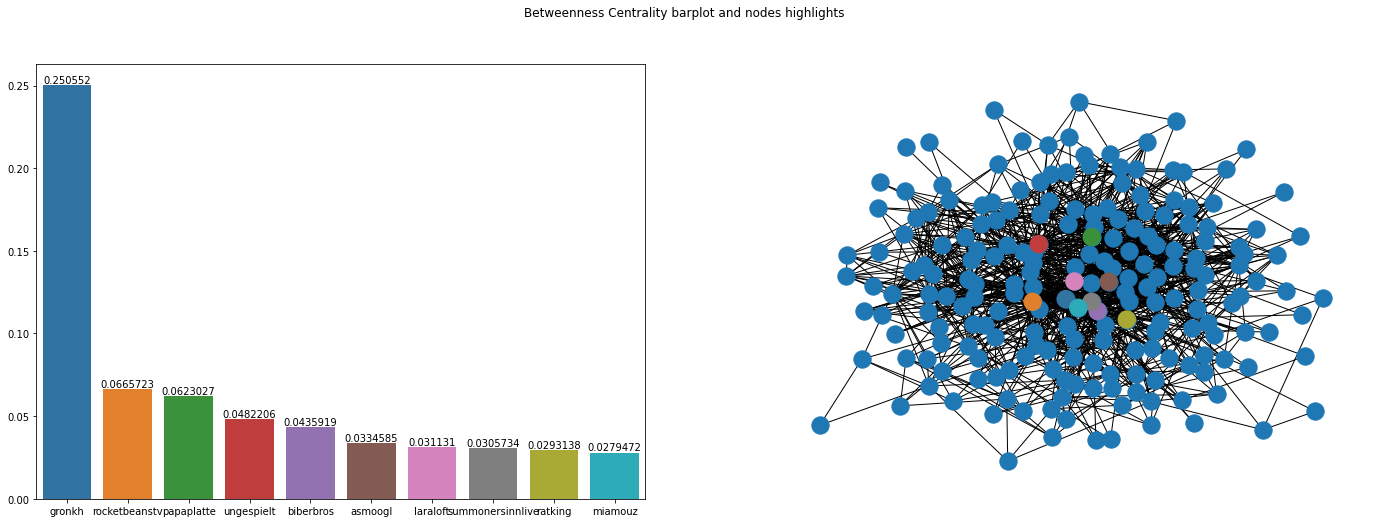

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [70]:
dizionario_colori = barplot_nodes(graph,bet, "Betweenness", pos)

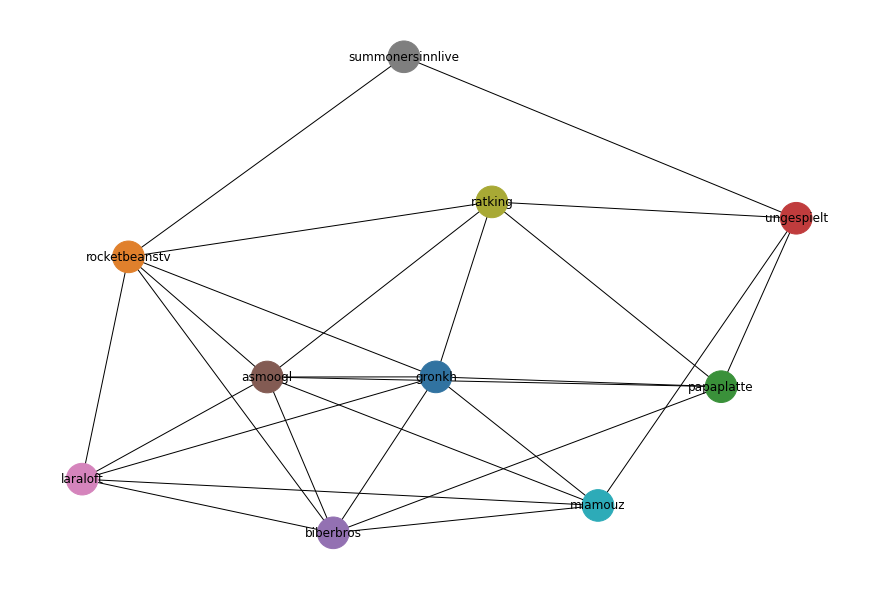

In [59]:
important_node_centrality_plot(bet, df_edge, dizionario_colori)

Closeness Centrality

<Figure size 1080x720 with 0 Axes>

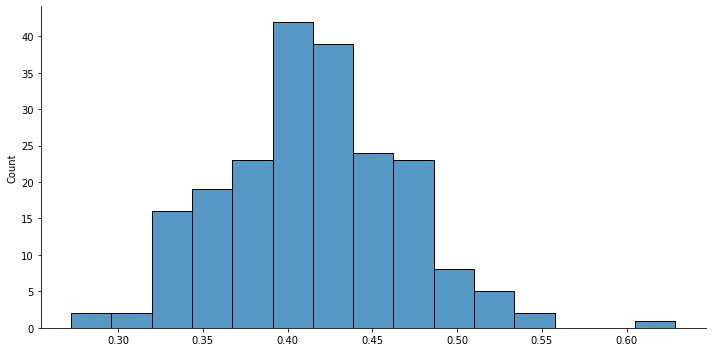

In [60]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(clos.values()), kde=False, aspect = 2)

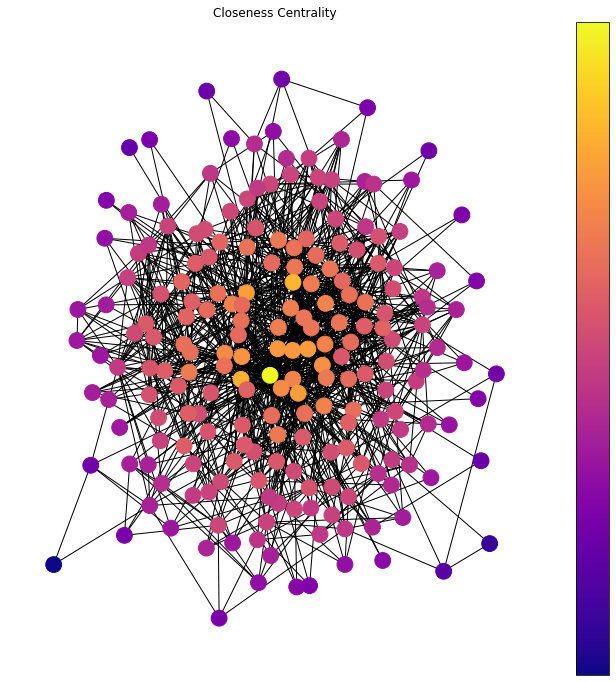

In [61]:
plt.figure(figsize=(12,12))
#pos = nx.kamada_kawai_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

0.6288343558282209
0.5466666666666666
0.5423280423280423
0.5216284987277354
0.5203045685279187
0.5189873417721519
0.5150753768844221
0.5150753768844221
0.5074257425742574
0.5036855036855037
{'gronkh': '#3173a1', 'papaplatte': '#e0802c', 'rocketbeanstv': '#3a913a', 'biberbros': '#c03c3d', 'ungespielt': '#9371b2', 'asmoogl': '#835b53', 'shlorox': '#d584bc', 'laraloft': '#7f7f7f', 'mrmoregame': '#a8a935', 'nintendino': '#2dabb8'}


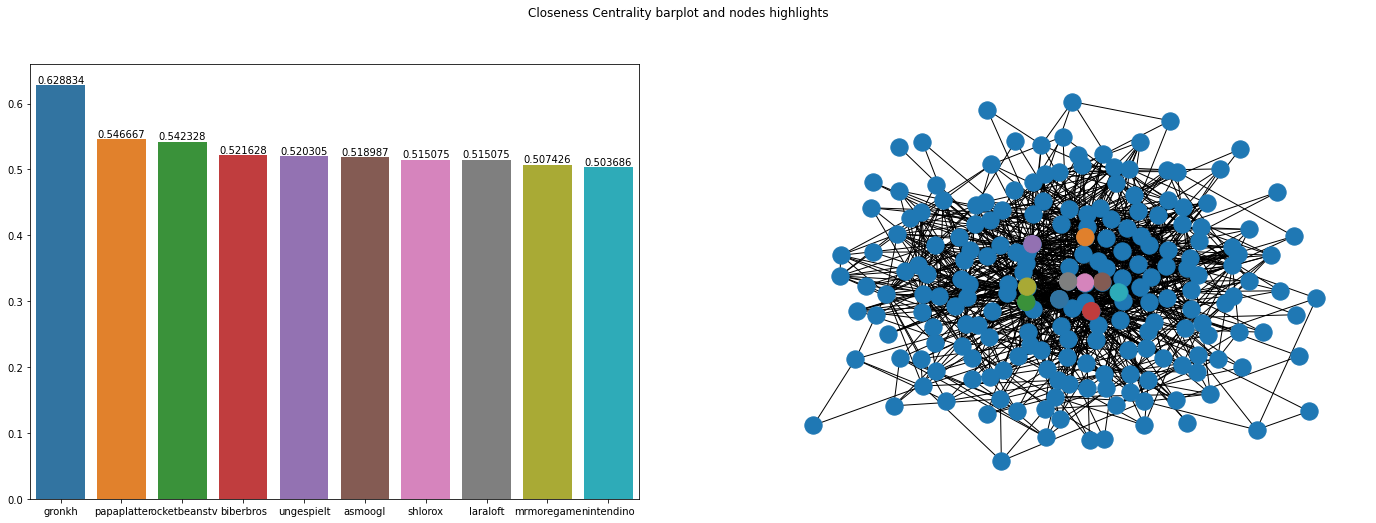

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [71]:
dizionario_colori = barplot_nodes(graph,clos, "Closeness", pos)

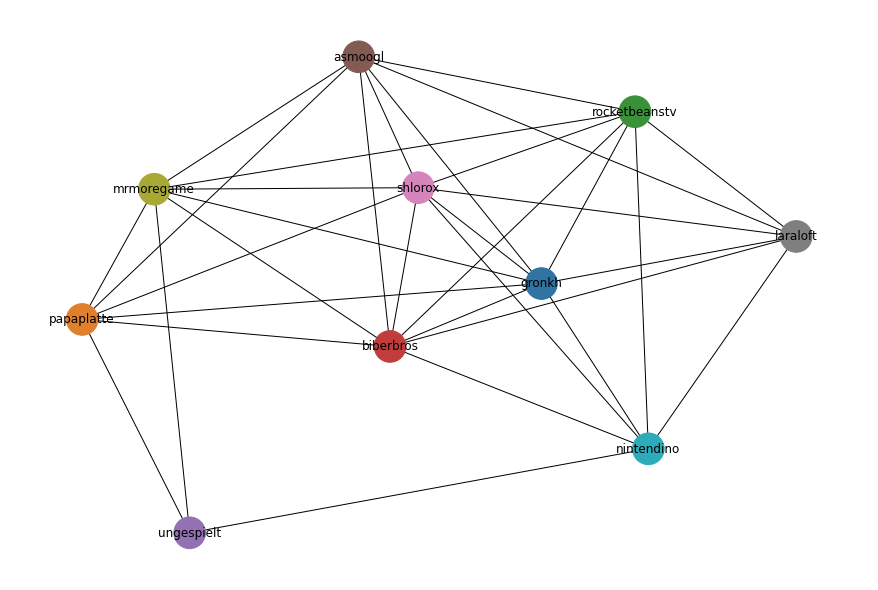

In [63]:
important_node_centrality_plot(clos, df_edge, dizionario_colori)

Eigenvector Centrality

C:\Users\mat98\AppData\Local\Temp\ipykernel_213284\1676484988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=True)


<AxesSubplot:ylabel='Density'>

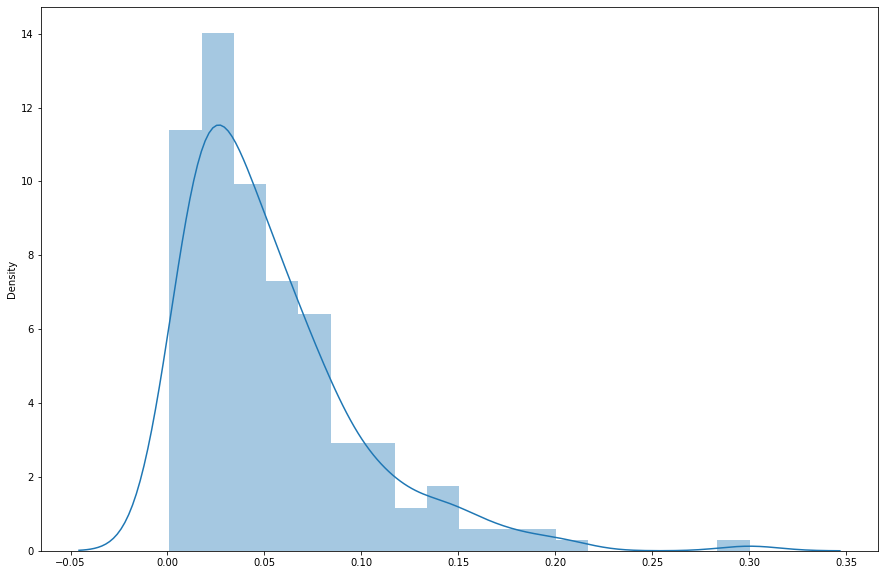

In [64]:
eigv = nx.eigenvector_centrality(graph, max_iter = 800)
plt.figure(figsize=(15,10))
sns.distplot(list(eigv.values()), kde=True)

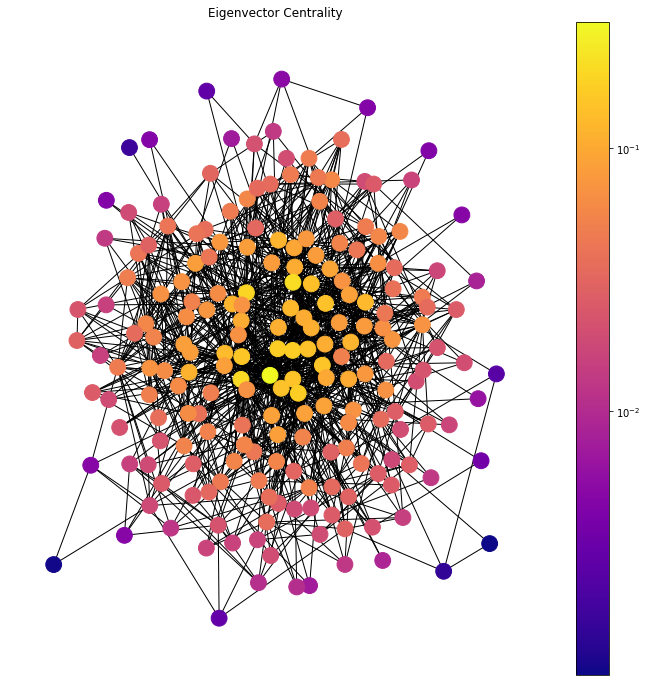

In [65]:
plt.figure(figsize=(12,12))
#pos = nx.kamada_kawai_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

0.30023451943046825
0.2070423372106369
0.19790387965128658
0.18459044661537963
0.17091249360713895
0.1700555205087346
0.16438360094357973
0.15164967632100915
0.14986633213806178
0.14520303106291935
{'gronkh': '#3173a1', 'papaplatte': '#e0802c', 'rocketbeanstv': '#3a913a', 'ungespielt': '#c03c3d', 'shlorox': '#9371b2', 'biberbros': '#835b53', 'laraloft': '#d584bc', 'mrmoregame': '#7f7f7f', 'nintendino': '#a8a935', 'summonersinnlive': '#2dabb8'}


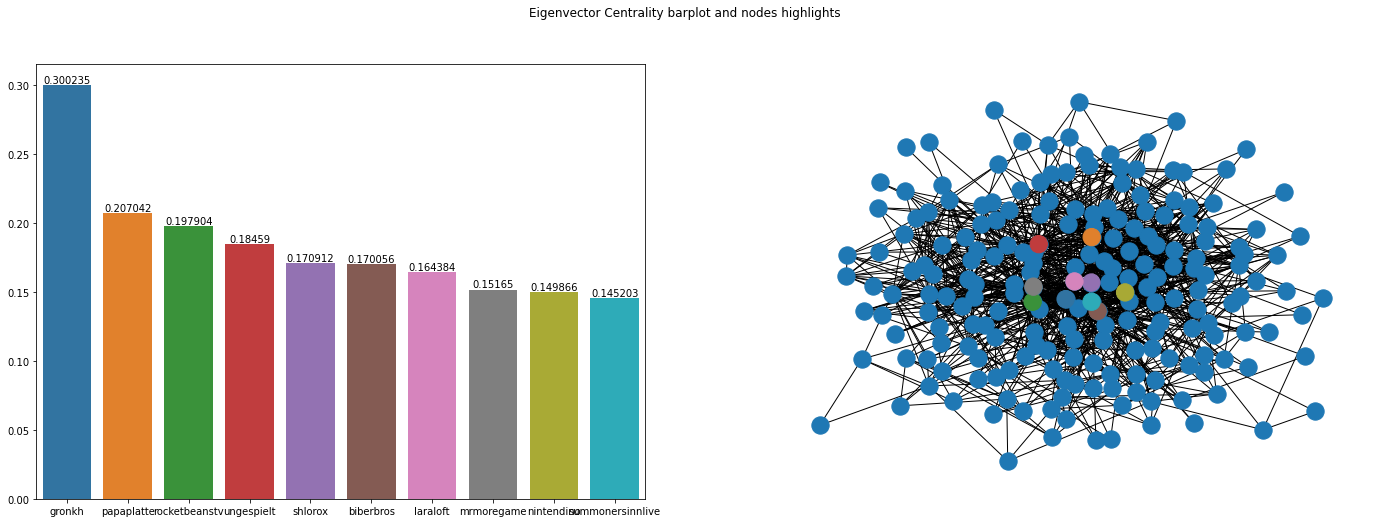

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [72]:
dizionario_colori = barplot_nodes(graph,eigv, "Eigenvector", pos)

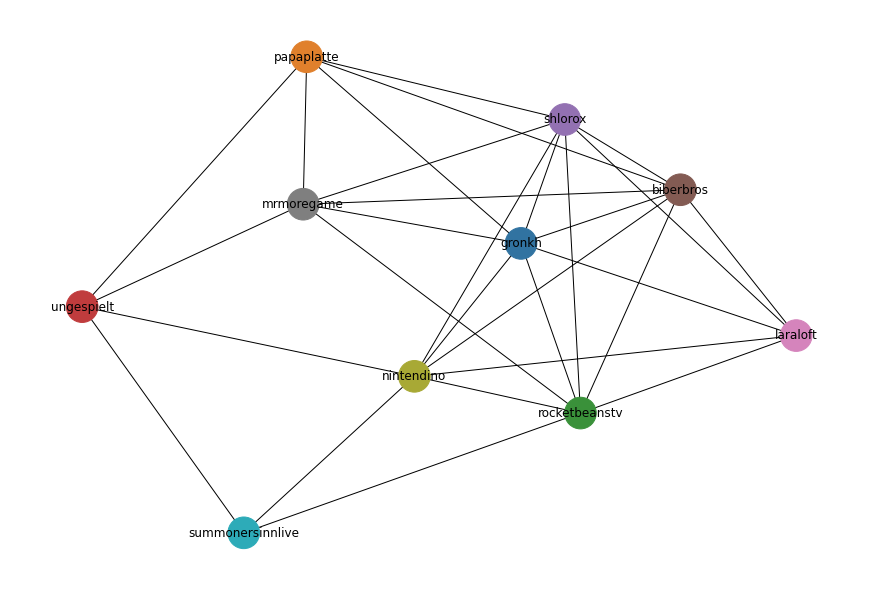

In [67]:
important_node_centrality_plot(eigv, df_edge, dizionario_colori)

### Analisi delle strutture

Communites

In [132]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)

In [133]:
def caricamento(nodes):
    edges = []
    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))
    return edges

def grafo(nodes, edges):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    graph.add_nodes_from(nodes)
    pos = nx.kamada_kawai_layout(graph)
    return graph

def visualizza(graph,dizionario,k):
    plt.figure(figsize=(12,10))
    #fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14, 6))
    plt.suptitle('Community '+str(k+1))
    colors = sns.color_palette('pastel')[0:5]
    #ax1.pie([dizionario["mature"],dizionario["not_mature"]], labels = ["Mature","Not Mature"], colors = ["#FF7514","#008f39"], autopct='%.0f%%')
    pos = nx.kamada_kawai_layout(graph)
    nx.draw(graph, pos,node_size=300,font_size=6)
    nx.\
       draw_networkx_nodes(graph, pos, nodelist=list(dizionario["colors"].keys()), node_color=list(dizionario["colors"].values()))\
       .set_edgecolor('k') 

In [134]:
dictionary = {}
k=0
mature_color="#008f39"
not_mature_color="#008f39"
for c in communities:
    mature = 0
    not_mature = 0
    supp_dic={}
    supp_dic_2 = {}
    supp_list=[]
    views = []
    total_views=0
    for el in c:
        node = df_target[df_target["username"]==el]
        total_views += int(node["views"])
        views.append(int(node["views"]))
        if node["mature"].bool(): 
            supp_dic[el]=mature_color
            mature+=1
        else:
            supp_dic[el]=not_mature_color
            not_mature+=1
    supp_dic_2["colors"] = supp_dic
    supp_dic_2["mature"] = mature
    supp_dic_2["not_mature"] = not_mature
    supp_dic_2["mean_views"] = round(total_views/len(c),2)
    supp_dic_2["dev_standard_views"] = np.std(views)
    print(supp_dic_2["dev_standard_views"])
    dictionary[k] = supp_dic_2
    k+=1



4077541.4955595704
5379636.587521152
8356019.561018094
22395813.193614595
3044327.54357517
466468.28214967484
898728.2972366231
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


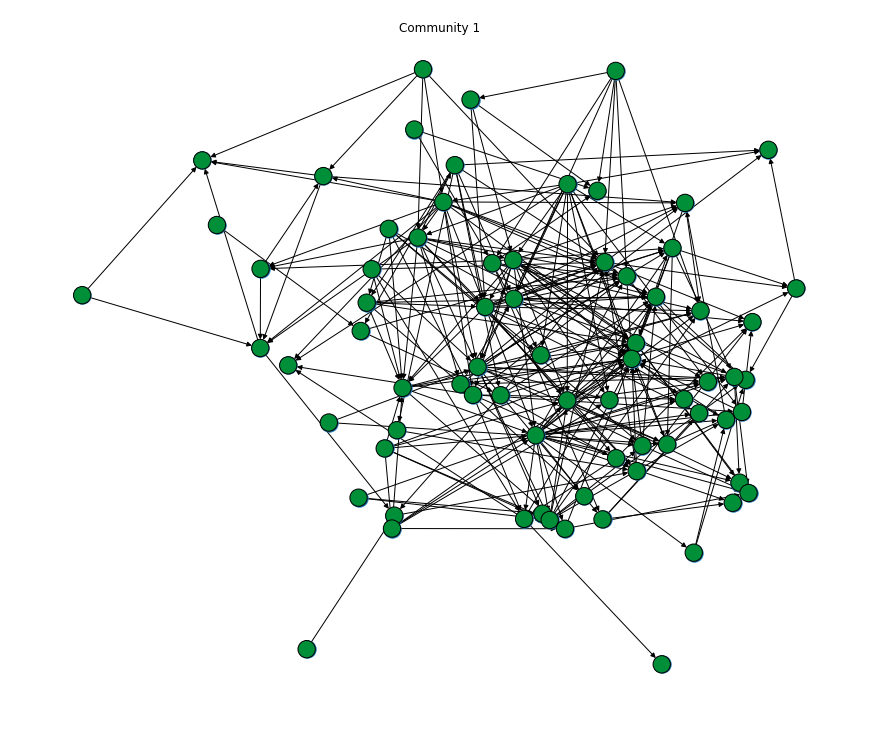

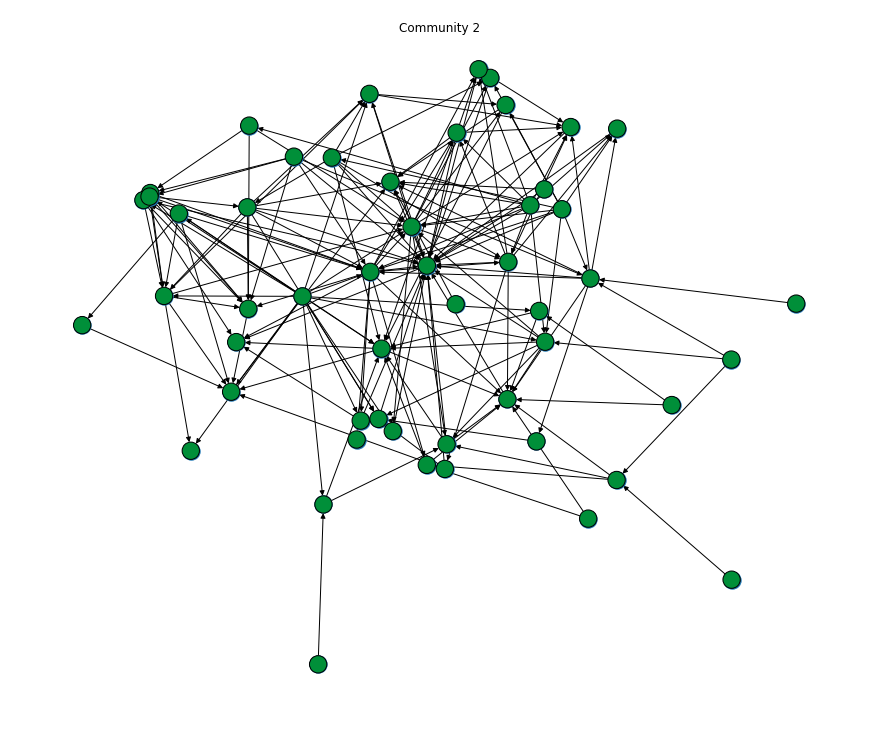

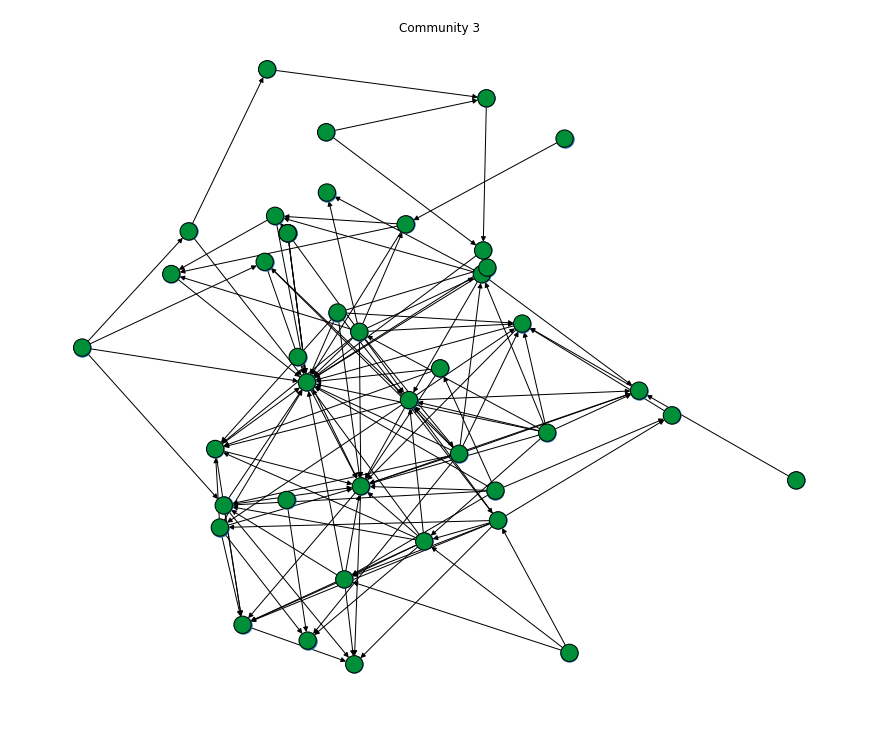

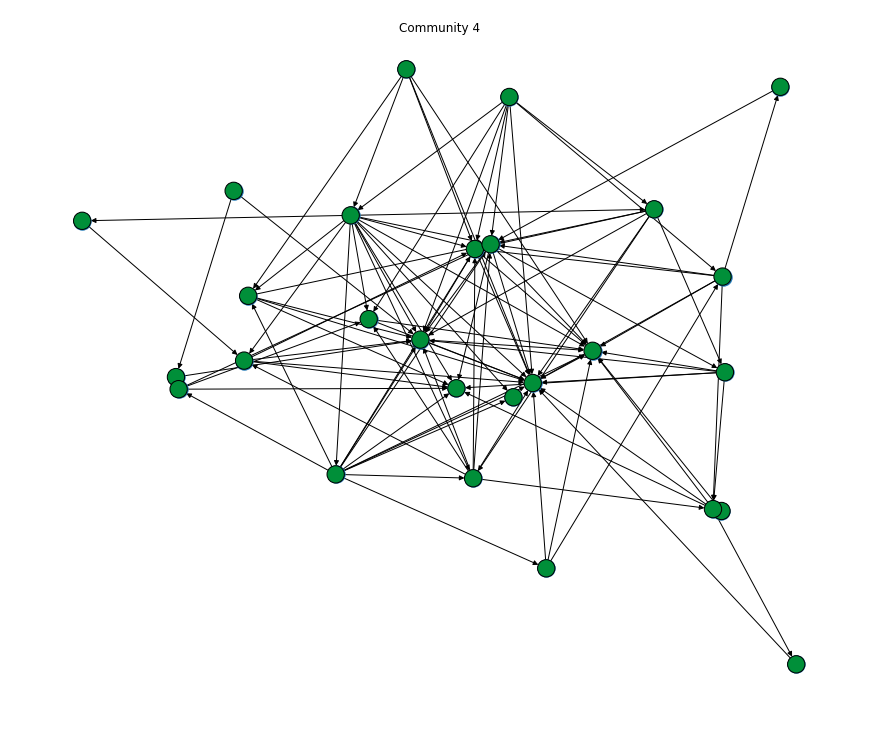

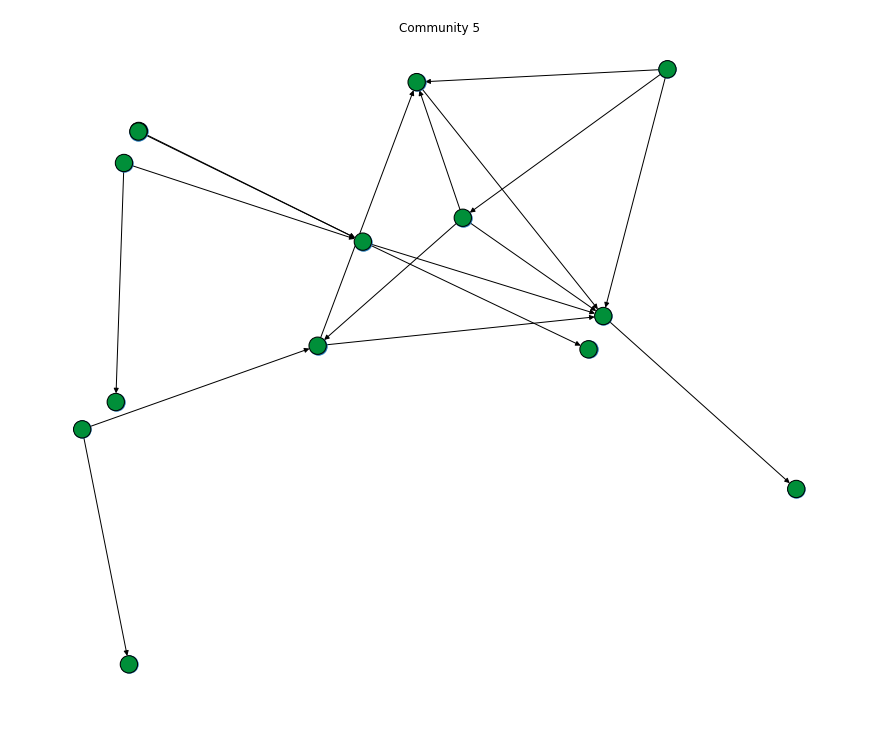

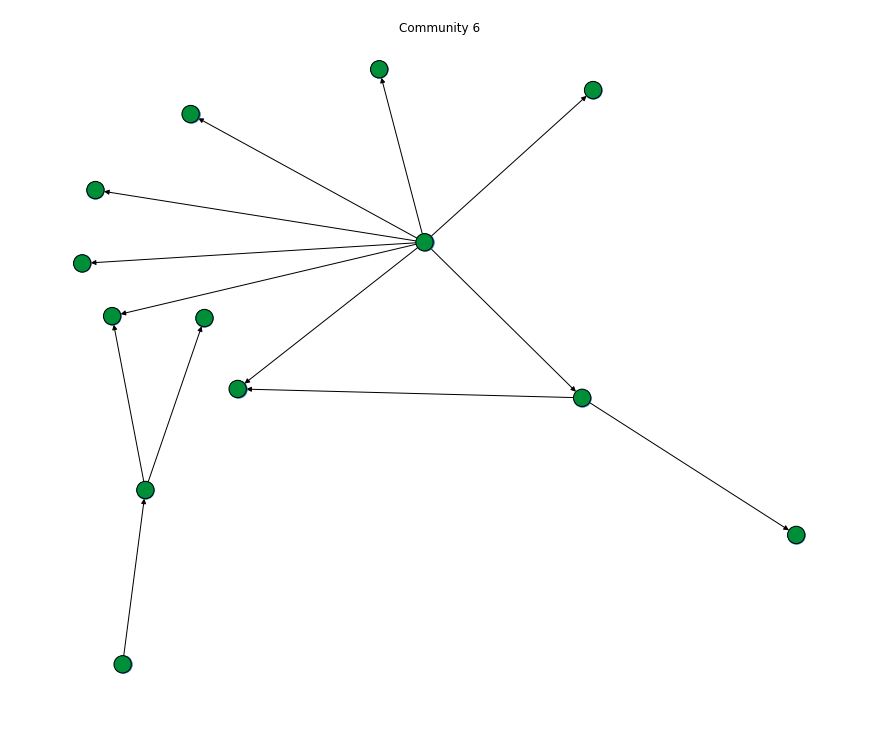

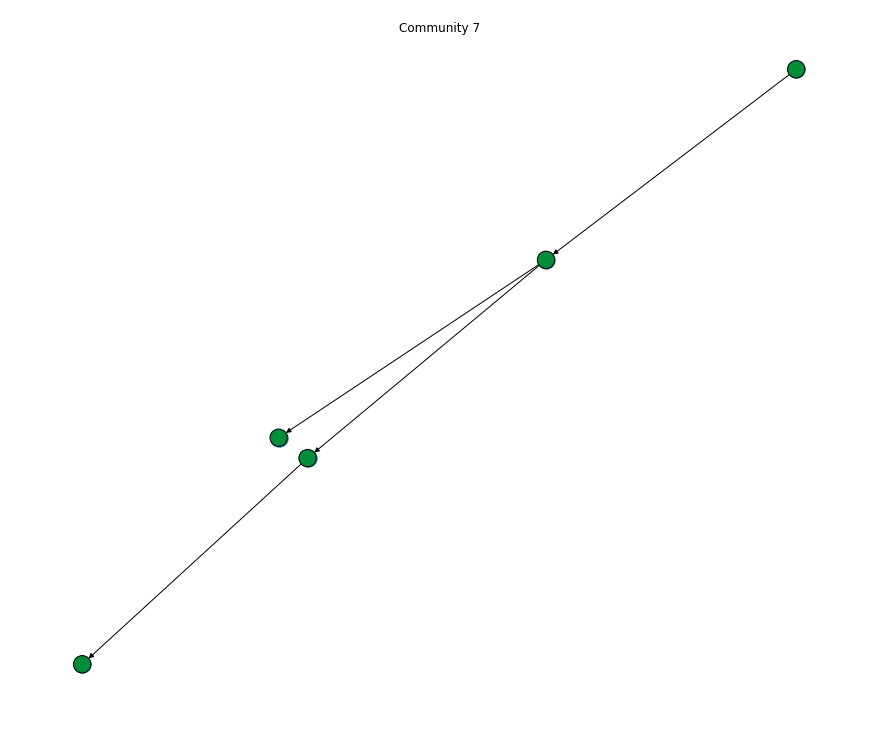

In [135]:
k=0
mean_views = []
dev_standard_views = []
list_communites = []
for c in communities:
    if len(c) == 1:
        continue
    edges = caricamento(c)
    visualizza(grafo(c, edges),dictionary[k],k)
    mean_views.append(dictionary[k]["mean_views"])
    dev_standard_views.append(dictionary[k]["dev_standard_views"])
    list_communites.append("Community "+str(k+1))
    k+=1

[4077541.4955595704, 5379636.587521152, 8356019.561018094, 22395813.193614595, 3044327.54357517, 466468.28214967484, 898728.2972366231]


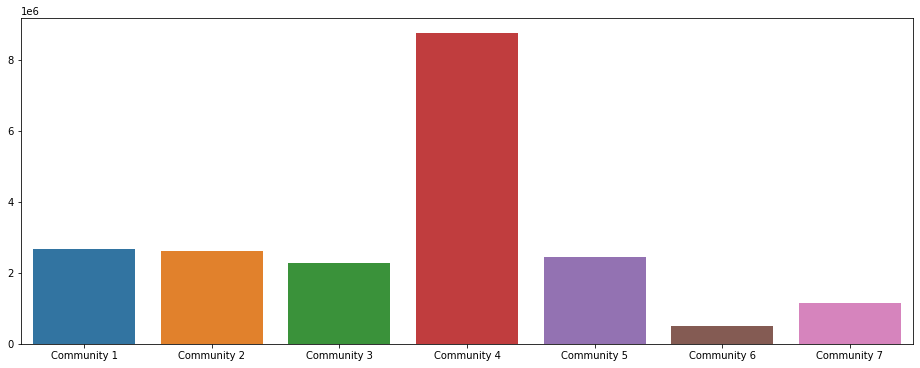

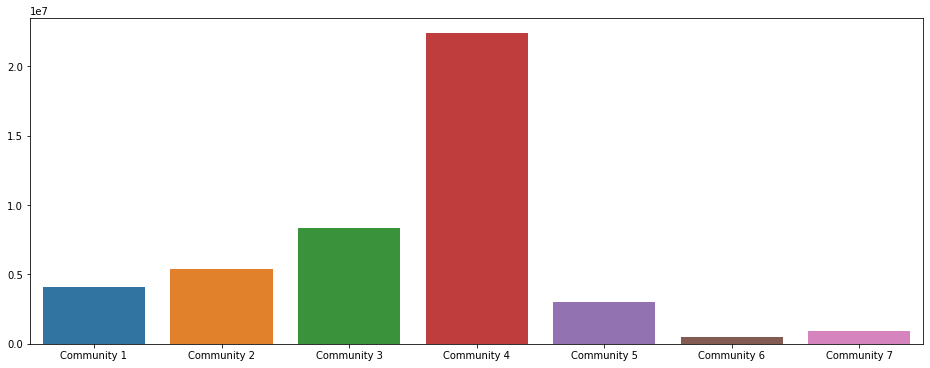

In [136]:
plt.figure(figsize=(len(communities), 6))
sns.barplot(x=list_communites,y= mean_views)
plt.figure(figsize=(len(communities), 6))
sns.barplot(x=list_communites,y= dev_standard_views)
print(dev_standard_views)

Triadi

In [137]:
def trova_triadi(grafo):
  triadi = {}
  for nodes in combinations(grafo.nodes, 3):
    n_edges = grafo.subgraph(nodes).number_of_edges()
    triadi.setdefault(n_edges, []).append(nodes)
  return(triadi)

In [138]:
'''
triadi = trova_triadi(graph)
print('Triadi del grafo totale: ' + str(len(triadi[1])))
'''

"\ntriadi = trova_triadi(graph)\nprint('Triadi del grafo totale: ' + str(len(triadi[1])))\n"

In [139]:
'''
count = 1
print('Triadi per community')
for community in communities:
    if len(community) == 1:
        continue
    edge = caricamento(community)
    community_graph = grafo(community,edge)
    triadi = trova_triadi(community_graph)
    if not 1 in triadi:
        continue
    print("Community " + str(count) + " : " + str(len(triadi[1])))
    count = count + 1
'''

'\ncount = 1\nprint(\'Triadi per community\')\nfor community in communities:\n    if len(community) == 1:\n        continue\n    edge = caricamento(community)\n    community_graph = grafo(community,edge)\n    triadi = trova_triadi(community_graph)\n    if not 1 in triadi:\n        continue\n    print("Community " + str(count) + " : " + str(len(triadi[1])))\n    count = count + 1\n'

Clique

In [140]:
#Codice per trovare le Clique
max = 0
max_clique = []
cliques = nx.find_cliques(graph.to_undirected())
for clique in cliques:
    if max < len(clique):
        max = len(clique)
        max_clique = clique
print(max)
print(max_clique)

8
['swisspact', 'scarlet', 'shroomyderfrosch', 'regibang', 'steveparker', 'raizordata', '3834', 'presentlp']


K-core

In [141]:
#Codice per trovare K-core
# Calcolo del k-core del grafo (nel caso specifico, k = 3)
k = 3
k_core = nx.k_core(graph, k)
print('k-core con k=3    len='+str(len(list(k_core.nodes()))))
print(list(k_core.nodes()))

k_core = nx.k_core(graph)
print('\nk-core: Main core    len='+str(len(list(k_core.nodes()))))
print(list(k_core.nodes()))

k-core con k=3    len=192
['grumm3l', 'riokatlp', 'ratking', 'mori09tv', 'lp4charity', 'eikarrramba', 'youbetterknowme', 'summonersinnlive', 'mootality', 'jeff', 'velafee', 'miamouz', 'nintendino', 'horstor', 'perrick', 'doktorfroid', 'norisk', 'corrona', 'lessqqll', 'sukidingels', 'lumemories', 'einpapo', 'mrmoregame', 'dj_michii', 'dracon', 'cmdkrieger', 'papaplatte', 'wildeuschi', 'lpmassive', 'meloonie', 'brogamerview', 'flyinguwe87', 'bibaboy', 'selphy', 'laex', 'aphostle', 'ilovecookiiezz', 'ungespielt', 'veni', 'monti', 'bastighg', 'gronkh', 'scarlet', 'emero', 'iblali', 'swisspact', 'dieserpan', 'lenavanille', 'skate702', 'trymacs', 'steveparker', 'regibang', 'fulltimegameslive', 'm0m0', 'rionqq', 'shroomyderfrosch', 'presentlp', 'rocketbeanstv', 'raizordata', 'sephiron', 'deke64', '3834', 'june', 'tomravach', 'izabelaone', 'mitschl88', 'drerhano', 'i_am_ezy', 'c4mlann', 'shlorox', 'martin_guerrero', 'dansen', 'hahn', 'jakeey', 'davetv', 'slivooo', 'cornel', 'sirlolp', 'wolou',

Ego Network

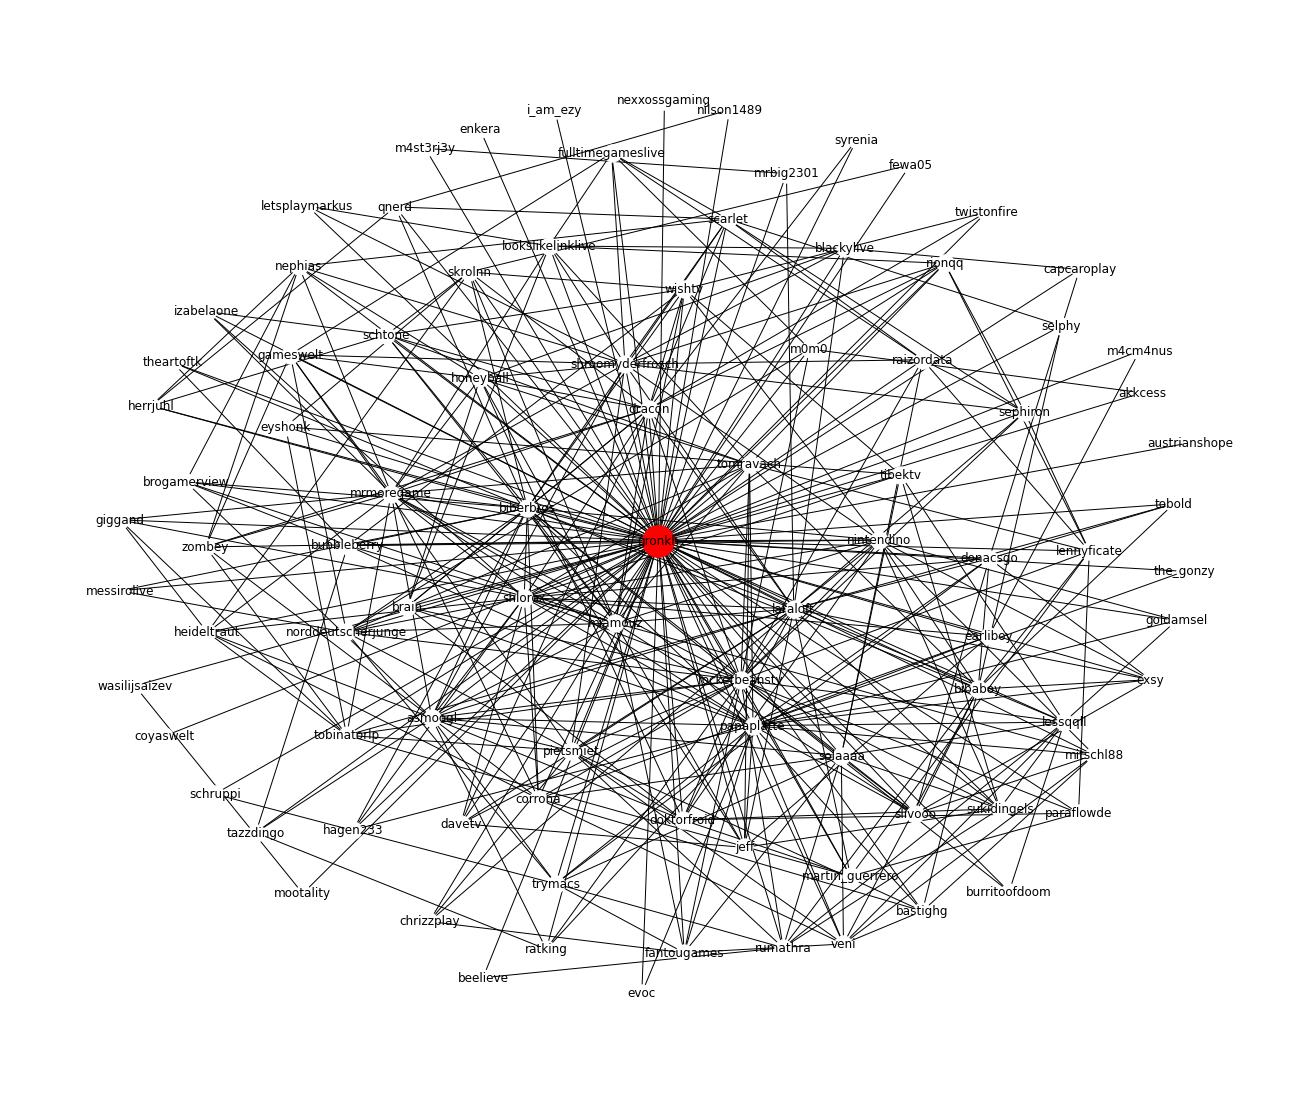

In [142]:
#Ego network della rete completa
plt.figure(figsize=(18, 15))
node_and_degree = graph.degree()
(largest_hub, degree_hub) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Crea l'ego network dal componente principale (largest hub)
hub_ego = nx.ego_graph(graph, largest_hub)

# Plotta i nodi attorno al nodo ego
pos = nx.kamada_kawai_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='w', node_size=300, with_labels=True)

# Plotta il nodo ego (grande rosso)
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=1000, node_color='r')
plt.show()

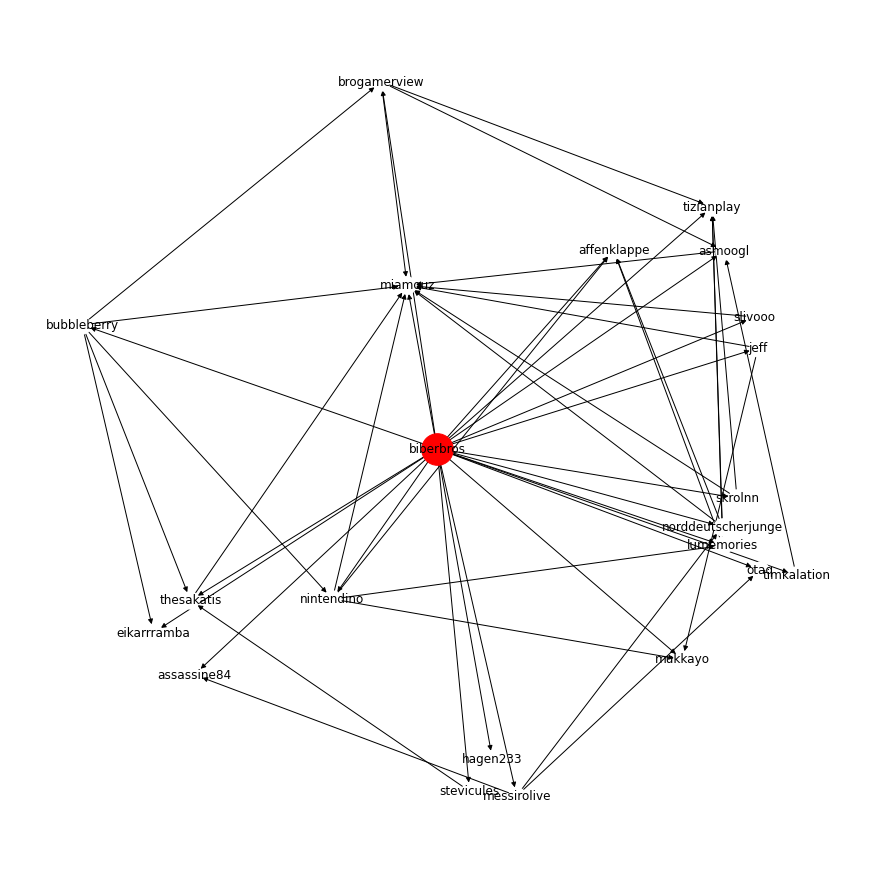

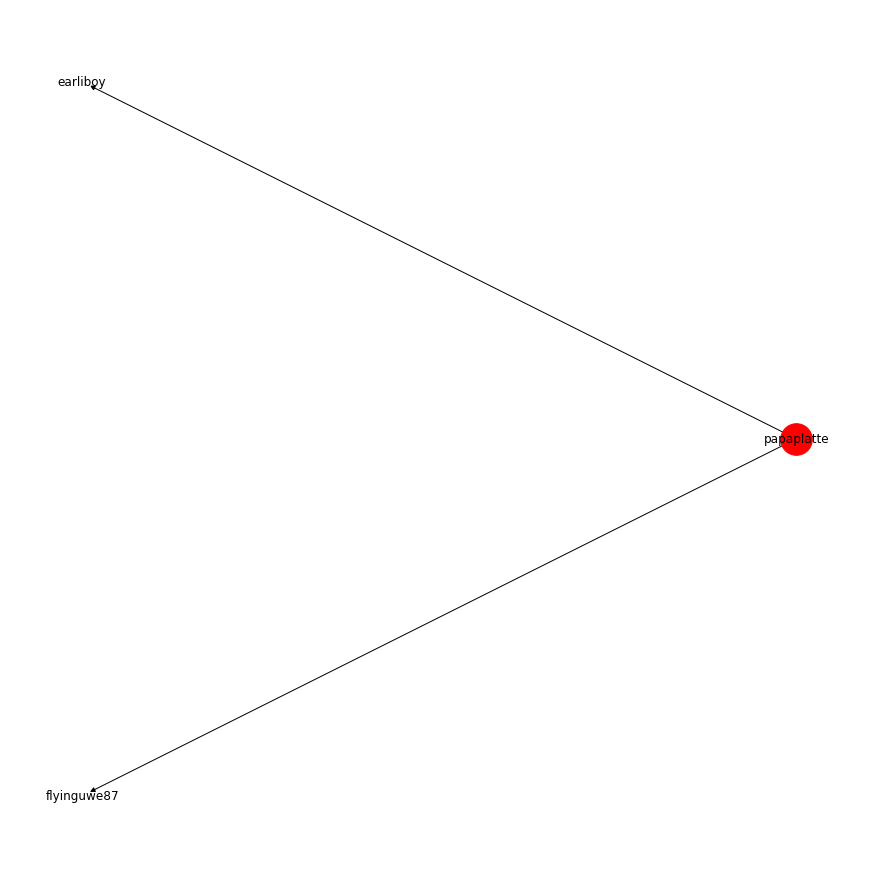

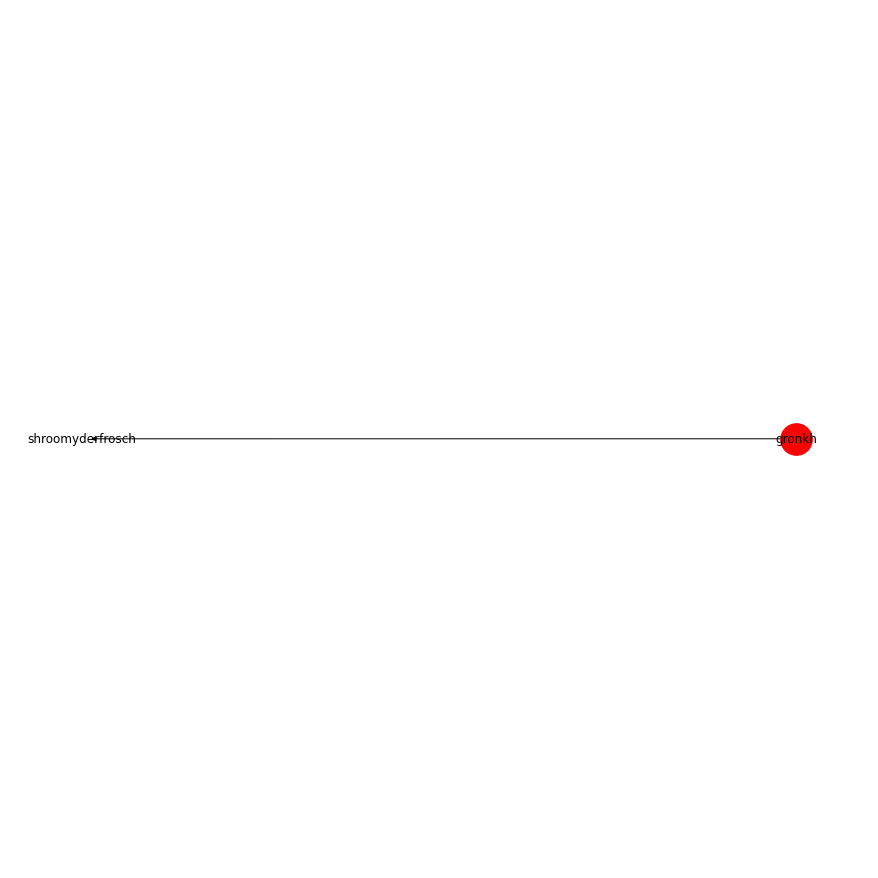

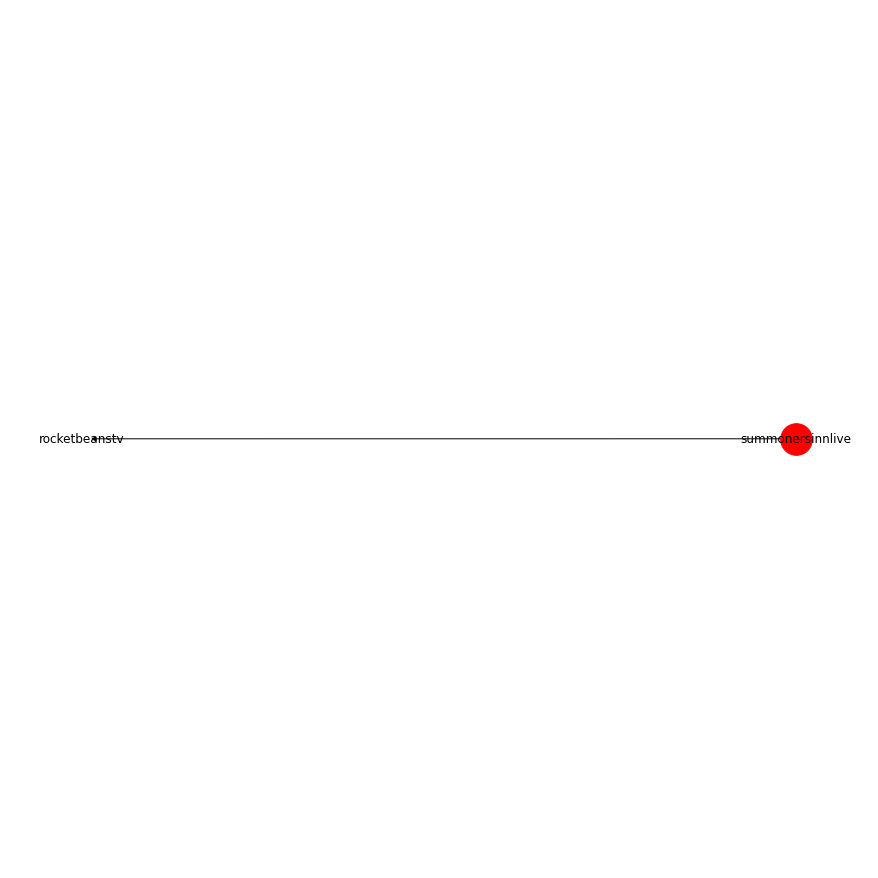

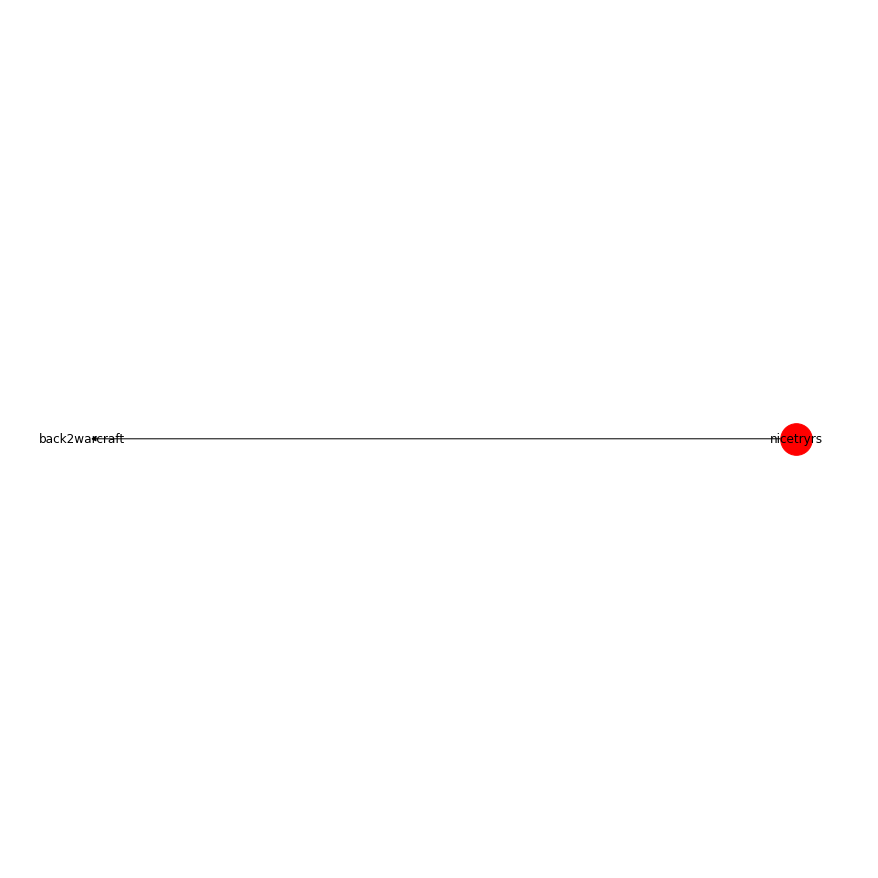

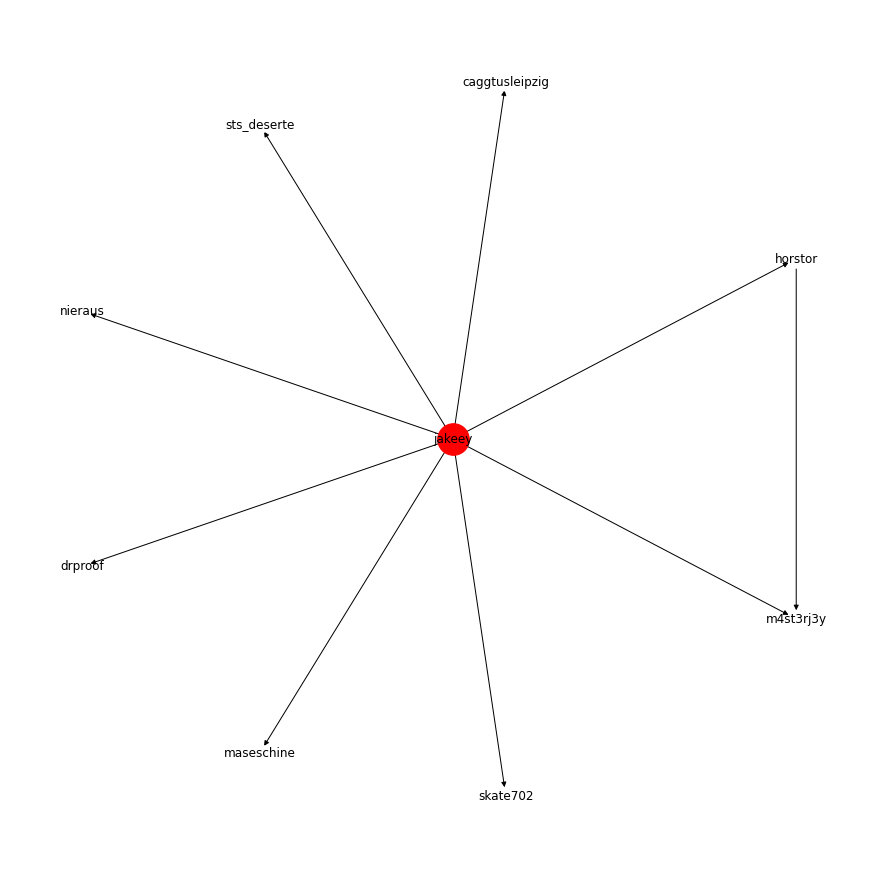

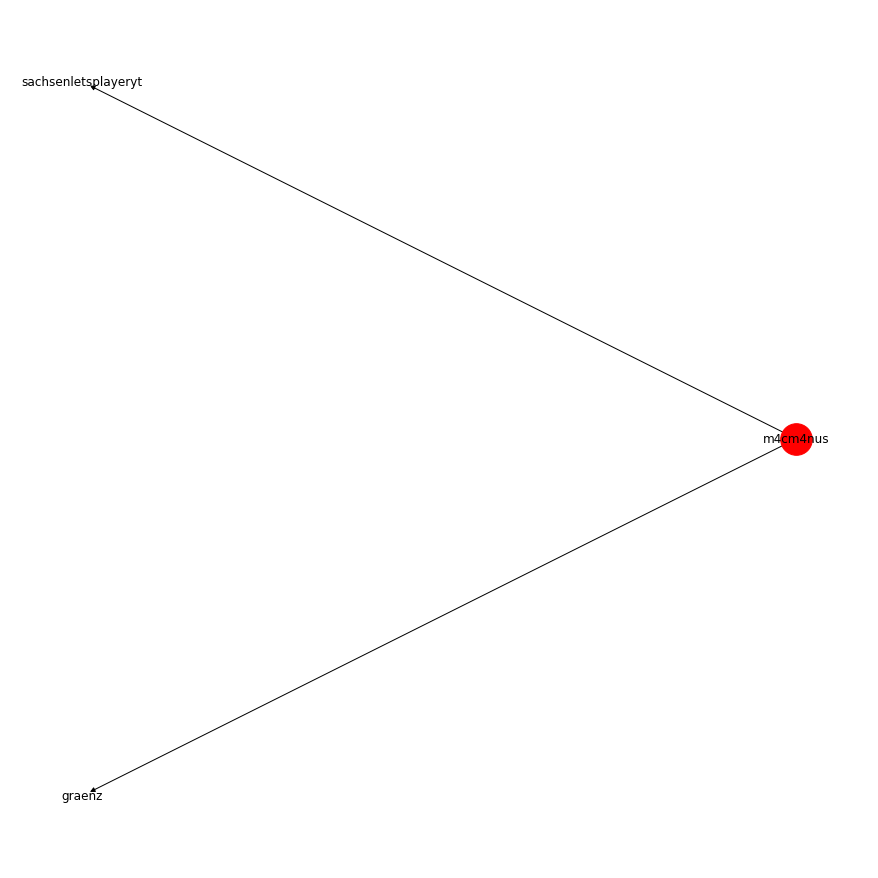

In [143]:
#Ego network delle singole community
count = 1
for community in communities:
    if len(community) == 1:
        continue
    edge = caricamento(community)
    community_graph = grafo(community,edge)
    plt.figure(figsize=(12, 12))
    node_and_degree = community_graph.degree()
    (largest_hub, degree_hub) = sorted(node_and_degree, key=itemgetter(1))[-1]

    # Crea l'ego network dal componente principale (largest hub)
    hub_ego = nx.ego_graph(community_graph, largest_hub)

    # Plotta i nodi attorno al nodo ego
    pos = nx.kamada_kawai_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='w', node_size=300, with_labels=True)

    # Plotta il nodo ego (grande rosso)
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=1000, node_color='r')
    plt.show()